In [1]:
import json
from twython import Twython
import pandas as pd
import numpy as np


# Enter your keys/secrets as strings in the following fields
#credentials = {}
#credentials['CONSUMER_KEY'] = ''
#credentials['CONSUMER_SECRET'] = ''
#credentials['ACCESS_TOKEN'] = '-'
#credentials['ACCESS_SECRET'] = ''

# Save the credentials object to file
#with open("twitter_credentials.json", "w") as file:
#    json.dump(credentials, file)
    
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file) 
    
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])    

## look for key word

In [ ]:
query = {'q': 'energy',
        'result_type': 'recent',  # other options 'mixed','popular','recent'
        'count': 10,   # max 100
         # 'until':"2019-02-01",
         'geocode': '51.51753,-0.11214,1000mi'
        }

dict_ = {'user': [],
         'date': [],
         'text': [],
         'favorite_count': [],
         'retweet_count': [],
         'user_loc': [],
         'followers_count': [],
         'lang': [],
         'user_desc': [],
         'hashtags': [],
         'user_verified': [],
         'geo': [],
         'coordinates':[],
         'place':[],
         #'user_loc_country':[]
         
        }


for status in python_tweets.search(**query)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['user_loc'].append( status['user']['location'])
    dict_['followers_count'].append(status['user']['followers_count'])
    dict_['lang'].append(status['lang'])
    dict_['user_desc'].append(status['user']['description'])
    dict_['user_verified'].append(status['user']['verified'])
    dict_['hashtags'].append(status['entities']['hashtags'])
    dict_['retweet_count'].append(status['retweet_count'])
    dict_['geo'].append(status['geo'])
    dict_['coordinates'].append(status['coordinates'])
    dict_['place'].append(status['place'])
    #dict_['user_loc_country'].append(status['user']['derived']['locations']['country'])
    
df = pd.DataFrame(dict_)
#dict_['text'][0]
df

In [ ]:
df.shape

In [ ]:
df

In [ ]:
#cities = pd.read_csv('list_cities.csv',sep=';')

## Translate queries and Tweets

In [2]:
from os import environ

from google.cloud import translate

def gtrans(text,dest='en'):
    
    '''this function represents the google translate API. use wisely!
    its expensive (20$/1mio characters, makes only 5000 tweets)'''
    
    
    project_id = 'lewagon-bootcamp-timwolfram' #environ.get("PROJECT_ID", "")

    parent = f"projects/{project_id}"
    client = translate.TranslationServiceClient()


    sample_text = text
    target_language_code = dest

    response = client.translate_text(
        contents=[sample_text],
        target_language_code=target_language_code,
        parent=parent,
    )

    for translation in response.translations:
        output_trans = translation.translated_text
        
    return output_trans

In [3]:
gtrans('Hallo Welt')

'Hello World'

In [4]:
dict_ = {'user': [],
             'date': [],
             'text': [],
             'text_en': [],
             'favorite_count': [],
             'retweet_count': [],
             'user_loc': [],
             'followers_count': [],
             'lang': [],
             'user_desc': [],
             'user_desc_en': [],
             'hashtags': [],
             'user_verified': [],

             #'geo': [],
             #'coordinates':[],
             #'place':[]

             #'user_loc_country':[]

            }



query_word = 'energy'

lang_list = ['en','de','fr','el','it','es',
                'pl', 'ro', 'nl', 'hu','pt',
                'sv',  'cs', 'bg', 'sk', 'da',
                'fi', 'hr', 'lt'
            ]

count_tweets = 1
result_type = 'mixed'

for lang in lang_list:
    
    query_word = gtrans(query_word, dest=lang)
    if lang == 'en':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '51.51753,-0.11214,1000mi'
            }
        
    elif lang == 'fr':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '47.22283,2.07099,1000mi'
            }
    elif lang == 'es':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': ' 40.42955,-3.67930,1000mi'
            }
        
    elif lang == 'pt':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '39.82059,-7.49342,1000mi'
            }
        
    else:
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
             # 'until':"2019-02-01",
             #'geocode': '50.0598058,14.3255426,1000km'
            }

   
    for status in python_tweets.search(**query)['statuses']:
        
        dict_['user'].append(status['user']['screen_name'])
        dict_['date'].append(status['created_at'])
        dict_['text'].append(status['text'])
        dict_['text_en'].append(gtrans(str(status['text']), dest='en'))#src=str(status['lang'])
        dict_['favorite_count'].append(status['favorite_count'])
        dict_['user_loc'].append( status['user']['location'])
        dict_['followers_count'].append(status['user']['followers_count'])
        dict_['lang'].append(status['lang'])
        dict_['user_desc'].append(status['user']['description'])
        try:
            dict_['user_desc_en'].append(gtrans(str(status['user']['description']), dest='en'))
        except:
            dict_['user_desc_en'].append('none')
        dict_['user_verified'].append(status['user']['verified'])
        dict_['hashtags'].append(status['entities']['hashtags'])
        dict_['retweet_count'].append(status['retweet_count'])


        #dict_['geo'].append(status['geo'])
        #dict_['coordinates'].append(status['coordinates'])
        #dict_['place'].append(status['place'])
        #dict_['user_loc_country'].append(status['user']['derived']['locations']['country'])


df = pd.DataFrame(dict_)
#dict_['text']
df


,user,date,text,text_en,favorite_count,retweet_count,user_loc,followers_count,lang,user_desc,user_desc_en,hashtags,user_verified
0,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
1,PrimeministerGR,Wed Jun 02 19:09:15 +0000 2021,Την διαδικασία θα μελετήσουν το Πανεπιστήμιο Α...,The process will be studied by the University ...,416,71,Greece,632095,el,Σελίδα του Πρωθυπουργού της Ελληνικής Δημοκρατ...,Page of the Prime Minister of the Hellenic Rep...,[],True
2,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10039,3161,,85340,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
3,Brandon_Davies0,Sat Jun 05 20:02:44 +0000 2021,Hemos echado de menos tanto vuestra energía… F...,We have missed your energy so much… Happy to h...,1843,75,"Barcelona, Spain",13218,es,Husband. Father. LDS. BYU Cougar. Professional...,Husband. Father. LDS. BYU Cougar. Professional...,"[{'text': 'FORÇABARÇA', 'indices': [98, 109]}]",True
4,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10039,3161,,85340,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
5,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
6,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
7,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10039,3161,,85340,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
8,Brandon_Davies0,Sat Jun 05 20:02:44 +0000 2021,Hemos echado de menos tanto vuestra energía… F...,We have missed your energy so much… Happy to h...,1843,75,"Barcelona, Spain",13218,es,Husband. Father. LDS. BYU Cougar. Professional...,Husband. Father. LDS. BYU Cougar. Professional...,"[{'text': 'FORÇABARÇA', 'indices': [98, 109]}]",True
9,chelseafc_indo,Mon Jun 07 00:00:00 +0000 2021,"Minggu baru telah menanti, segera bangun dari ...","A new week awaits, wake up soon from your swee...",151,20,"London, Inggris",2264890,in,Selamat datang di akun Twitter resmi Chelsea F...,Welcome to the official Chelsea FC Twitter acc...,[],True


In [ ]:
#cities = pd.read_csv('list_cities2.csv', delimiter=';')

In [ ]:
#cities

In [ ]:
### filter for european countries

## sentiment analysis

In [ ]:
from textblob import TextBlob
import nltk
import string
#nltk.download('brown')
import string

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
text = df['text_en'][1]
text

In [ ]:
#text = text.lower()

##remove punctiation

for punctuation in string.punctuation:
    text = text.replace(punctuation, '') 
    
##remove stopwords
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(text) 
  
text = [w for w in word_tokens if not w in stop_words] 

#text = ' '.join(text)
  

In [ ]:
text = ' '.join(text)
text

In [ ]:
wiki = TextBlob(text)
#wiki.tags

In [ ]:
print(wiki.noun_phrases)

In [ ]:
testimonial = TextBlob(text)
print(testimonial.sentiment)
print(testimonial.sentiment.polarity)

## all functions for .py file

In [6]:
from os import environ
import json
import pandas as pd
from google.cloud import translate
from twython import Twython


# Enter your keys/secrets as strings in the following fields
#credentials = {}
#credentials['CONSUMER_KEY'] = ''
#credentials['CONSUMER_SECRET'] = ''
#credentials['ACCESS_TOKEN'] = '-'
#credentials['ACCESS_SECRET'] = ''

#Save the credentials object to file
#with open("twitter_credentials.json", "w") as file:
#    json.dump(credentials, file)
    
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file) 
    
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])    


def get_places():
    
    '''creates a list of places and countries in europe, for locality-filtering the output tweets'''
    cities = pd.read_csv('list_cities3.csv',delimiter=';')
    
    list_cities = list(cities['city'])
    list_cities = [element.lower() for element in list_cities]
    list_countries = list(set(cities['county']))
    list_countries = [element.lower() for element in list_countries]
    list_eur = list_cities + list_countries
    return list_eur


def gtrans(text,dest='en'):
    
    '''this function represents the google translate API. use wisely!
    its expensive (20$/1mio characters, makes only 5000 tweets)'''
    
    
    project_id = 'lewagon-bootcamp-timwolfram' #environ.get("PROJECT_ID", "")

    parent = f"projects/{project_id}"
    client = translate.TranslationServiceClient()


    sample_text = text
    target_language_code = dest

    response = client.translate_text(
        contents=[sample_text],
        target_language_code=target_language_code,
        parent=parent,
    )

    for translation in response.translations:
        output_trans = translation.translated_text
        
    return output_trans


def local_filter(tweets, list_eur=get_places(), no_loc=True):
    
    '''filters the output of the get_tweets function to only get european posts'''
    
    if no_loc == True:
        list_eur.append('')
        
    for tweet in tweets:
        if not tweet['user_loc'].split(',')[0] in list_eur:
            tweets.remove(tweet)
        
        
    return tweets


def remove_duplicates(tweets):
    li = []
    for tweet in tweets:
        if not tweet in li:
            li.append(tweet)

    return li


def get_tweets(query,count,result_type='mixed'):   #count: max 10 because its looking for all 19 languages at once

    '''this function uses the twitter search endpoint with max 190 requests/15 min
    the output is a list of dictionaries with one dict per tweet.
    keys are the features of the tweets'''
    
    ''' it uses the google-translate API wich kosts 20$ per ~5000 tweets '''

    query_word = query
    count_tweets = count
    
    lang_list = ['en','de','fr','el','it','es',
                    'pl', 'ro', 'nl', 'hu','pt',
                    'sv',  'cs', 'bg', 'sk', 'da',
                    'fi', 'hr', 'lt'
                ]

    #dict_ = {}
    
    result_type = result_type # other options 'mixed','popular','recent'

    list_tweets = []

    for lang in lang_list:

        query_word = gtrans(query_word, dest=lang)
        if lang == 'en':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '51.51753,-0.11214,1000mi',
                'tweet_mode': 'extended'
                }

        elif lang == 'fr':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '47.22283,2.07099,1000mi',
                'tweet_mode': 'extended'
                }
            
        elif lang == 'es':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '40.42955,-3.67930,1000mi',
                'tweet_mode': 'extended'
                }

        elif lang == 'pt':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '39.82059,-7.49342,1000mi',
                'tweet_mode': 'extended'
                }

        else:
            query = {'q': query_word,
                'result_type': result_type,  # 
                'count': count_tweets,   # max 100
                #'geocode': '50.0598058,14.3255426,1000km'
                'tweet_mode': 'extended'
                }


        for status in python_tweets.search(**query)['statuses']:
            dict_ = {}
            dict_['id'] = status['id']
            dict_['user'] = status['user']['screen_name']
            dict_['date'] = status['created_at']
            dict_['text'] = status['full_text']
            dict_['text_en'] = gtrans(str(status['full_text']), dest='en')
            dict_['favorite_count'] = status['favorite_count']
            dict_['user_loc'] =  status['user']['location']
            dict_['followers_count'] = status['user']['followers_count']
            dict_['lang'] = status['lang']
            dict_['user_desc'] = status['user']['description']
            try:
                dict_['user_desc_en'] = gtrans(str(status['user']['description']), dest='en')
            except:
                dict_['user_desc_en'] = 'none'
            dict_['user_verified'] = status['user']['verified']
            dict_['hashtags'] = status['entities']['hashtags']
            dict_['retweet_count'] = status['retweet_count']

            list_tweets.append(dict_) 
    
    return list_tweets




In [7]:
tweets = get_tweets('energy',1)

In [ ]:
print(tweets)

In [ ]:
tweets_local = local_filter(tweets)
len(tweets_local)

In [ ]:
pd.DataFrame(tweets_local)

In [ ]:
print(tweets)

In [9]:
df_tweets = pd.DataFrame(tweets)

In [11]:
df_tweets['text_en'][4]

'When they opened up the energy market to competition, they promised the French that it would lower prices. This is not true. When they imposed the #Linky counter, they told the French that it would cost them nothing. This is not true. # les4V https://t.co/Jw5Adc1hom'

## geographical mapping of tweets

In [53]:
import altair as alt
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, 'countries')

alt.layer(
    alt.Chart(countries).mark_geoshape(
    fill='#666666',
    stroke='white'
).project(
    type= 'mercator',
    scale= 550,                          # Magnify
    center= [20,50],                     # [lon, lat]
    clipExtent= [[0, 0], [600, 400]],    # [[left, top], [right, bottom]]
).properties(
    title='Europe (Mercator)',
    width=600, height=400
),
alt.Chart(cents).mark_circle().encode(                   #map the points of my datasets encode where the circle go
        latitude='latitude:Q',               
        longitude='longitude:Q',
        #tooltip=['origin:N', 'routes:Q']
)
)


alt.LayerChart(...)

<ipython-input-7-38550cf5a6c7>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = world.centroid


<AxesSubplot:>

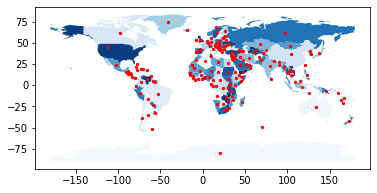

In [7]:
import geopandas as gpd
import pandas as pd

# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

# Plot the results
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

### streamlit

In [10]:
import streamlit as st
map_data = cents[['latitute','longitude']]

st.map(map_data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
map_data = cents[['latitude','longitude']]
map_data.to_csv('map_data.csv')

In [12]:
print (centroid_list)

                         name                            0
0                        Fiji  POINT (163.85316 -17.31631)
1                    Tanzania    POINT (34.75299 -6.25773)
2                   W. Sahara   POINT (-12.13783 24.29117)
3                      Canada   POINT (-98.14238 61.46908)
4    United States of America  POINT (-112.59944 45.70563)
..                        ...                          ...
172                    Serbia    POINT (20.81965 44.23304)
173                Montenegro    POINT (19.28618 42.78904)
174                    Kosovo    POINT (20.89536 42.57937)
175       Trinidad and Tobago   POINT (-61.33037 10.42824)
176                  S. Sudan     POINT (30.19862 7.29289)

[177 rows x 2 columns]


In [18]:
cents = pd.read_csv('country_centroids.csv',delimiter=';')
cents = cents.dropna()
cents


,country,latitude,longitude,name
0,AD,42.546.245,1.601.554,Andorra
1,AE,23.424.076,53.847.818,United Arab Emirates
2,AF,3.393.911,67.709.953,Afghanistan
3,AG,17.060.816,-61.796.428,Antigua and Barbuda
4,AI,18.220.554,-63.068.615,Anguilla
...,...,...,...,...
239,XK,42.602.636,20.902.977,Kosovo
240,YE,15.552.727,48.516.388,Yemen
241,YT,-128.275,45.166.244,Mayotte
242,ZA,-30.559.482,22.937.506,South Africa


In [28]:
type(cents['latitude'][1])

str

In [46]:
def redo(x):
    return int(str(x).replace(".", ""))

In [3]:
cents['latitude'] = cents['latitude'].apply(redo)
cents['longitude'] = cents['longitude'].apply(redo)
cents

NameError: name 'redo' is not defined

In [19]:
def trunc(x):
    return int(str(x).split('.')[0])

cents['latitude'] = cents['latitude'].apply(trunc)

In [20]:
cents['longitude'] = cents['longitude'].apply(trunc)

In [21]:
cents

,country,latitude,longitude,name
0,AD,42,1,Andorra
1,AE,23,53,United Arab Emirates
2,AF,3,67,Afghanistan
3,AG,17,-61,Antigua and Barbuda
4,AI,18,-63,Anguilla
...,...,...,...,...
239,XK,42,20,Kosovo
240,YE,15,48,Yemen
241,YT,-128,45,Mayotte
242,ZA,-30,22,South Africa


In [22]:
cents.to_csv('cents_trunc.csv')

In [23]:
cents_trunc = pd.read_csv('cents_trunc.csv')
cents_trunc

,Unnamed: 0,country,latitude,longitude,name
0,0,AD,42,1,Andorra
1,1,AE,23,53,United Arab Emirates
2,2,AF,3,67,Afghanistan
3,3,AG,17,-61,Antigua and Barbuda
4,4,AI,18,-63,Anguilla
...,...,...,...,...,...
237,239,XK,42,20,Kosovo
238,240,YE,15,48,Yemen
239,241,YT,-128,45,Mayotte
240,242,ZA,-30,22,South Africa


## Database retrieve

In [20]:
import requests
query = 'energy'
url = 'http://127.0.0.1:8000/query'
params = {
    'query':query,
    'index': 'eurlex',
    'n': 20
}     

response = requests.get(url,params=params).json()

In [21]:
print(response)

{'0': {'title': 'Energy: women as equal players in the 21st century', 'author': 'European Economic and Social Committee', 'date': '23/07/2020', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-01515-AS'}, '1': {'title': 'Offshore Renewable Energy Strategy', 'author': 'European Economic and Social Committee', 'date': '14/04/2021', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-05038-AS'}, '2': {'title': 'State of the Energy Union Report 2020 and Assessment of National Energy and Climate Plans', 'author': 'European Economic and Social Committee', 'date': '09/03/2021', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-04915-AS'}, '3': {'title': 'EU Strategy for Energy System Integration', 'author': 'European Economic and Social Committee', 'date': '16/12/2020', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-03534-AS'}, '4': {'title': 'COMMISSION STAFF WORKING DOCUMENT Clean E